<a href="https://colab.research.google.com/github/Yoshibansal/ML-basics/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fashion MNIST (Multi class classifier)

Learned how to do classificaiton using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [1]:
#importing tesnorflow

import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
#load module fashion_mnist from tensorflow
mnist = tf.keras.datasets.fashion_mnist

In [3]:
#loading data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Training label:  9


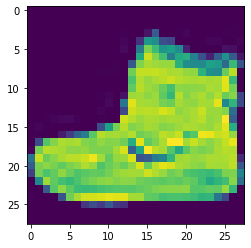

In [4]:
import matplotlib.pyplot as plt

index = 0

#plotting image corresponds to grid/matrix of pixel value at index
plt.imshow(training_images[index])

#label for matrix at index
print("Training label: ", training_labels[index])

#metrix
#print(training_images[index])

In [5]:
# normalizing data

training_images = training_images/255.0
test_images = test_images/255.0

In [6]:
INPUT_SHAPE = (28, 28)

#model architecture
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape = INPUT_SHAPE),
                             tf.keras.layers.Dense(128, activation = tf.nn.relu),
                             tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(
              optimizer = tf.keras.optimizers.Adam(), 
              loss = tf.keras.losses.sparse_categorical_crossentropy,
              metrics = ['accuracy']
    )

In [7]:
# Summary method allows you to inspect the layers of the model 
        # and see the journey of the model through the convolution
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
#training model

epoch = 10 #hyperparameter
model.fit(training_images, training_labels, epochs=epoch)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5000 - accuracy: 0.8236
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3737 - accuracy: 0.8644
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3388 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3131 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2952 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2799 - accuracy: 0.8974
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9016
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2543 - accuracy: 0.9060
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2443 - accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.236

In [9]:
#evaluating the model on test data

loss, acc = model.evaluate(test_images, test_labels)

#printing the loss and accuracy of trained model on test dataset
print("loss on test data: ", loss)
print('accuracy on test data: ', acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3598 - accuracy: 0.8761
loss on test data:  0.3598012626171112
accuracy on test data:  0.8761000037193298
